# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [53]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LouD\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv('news_api_key')

In [55]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [147]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q= 'bitcoin',
    language = 'en',
    page_size = 100,
    sort_by = 'relevancy')

In [148]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q= 'ethereum',
    language = 'en',
    page_size = 100,
    sort_by = 'relevancy')

In [149]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for i in bitcoin_news["articles"]:
    try:
        text = i["content"]
        date = i["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

In [150]:
#Turning into a DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

#reordering columns
cols = ['date','compound', 'positive', 'negative', 'neutral', 'text']
bitcoin_df = bitcoin_df[cols]

In [151]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []

for i in ethereum_news["articles"]:
    try:
        text = i["content"]
        date = i["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

In [152]:
#Turning into a DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

#reordering columns
cols = ['date','compound', 'positive', 'negative', 'neutral', 'text']
ethereum_df = ethereum_df[cols]

In [153]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.099995,0.054630,0.027820,0.917570
std,0.337583,0.065971,0.046005,0.083856
min,-0.680800,0.000000,0.000000,0.662000
25%,0.000000,0.000000,0.000000,0.859250
50%,0.000000,0.041000,0.000000,0.931000
75%,0.307625,0.094750,0.058500,1.000000
max,0.817600,0.269000,0.219000,1.000000


In [154]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.116632,0.051860,0.023230,0.924920
std,0.346204,0.064362,0.045068,0.075909
min,-0.918600,0.000000,0.000000,0.694000
25%,0.000000,0.000000,0.000000,0.874250
50%,0.000000,0.034000,0.000000,0.934000
75%,0.350450,0.083250,0.040500,1.000000
max,0.827100,0.256000,0.289000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the higher mean postive score of .05865

Q: Which coin had the highest compound score?

A: Ethereum had the highsest max compound score of .8176

Q. Which coin had the highest positive score?

A: Ethereum had the highest max postive score of .21

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [155]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [156]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = set(stopwords.words('english')

# Expand the default stopwords list if necessary
#sw_addon = ['said']

SyntaxError: unexpected EOF while parsing (<ipython-input-156-ba96552a3640>, line 8)

In [157]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    #Create list of stopwords
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z]')
    re_clean = regex.sub(' ', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(i) for i in words]
   
    # Convert the words to lowercase
    tokens = [i.lower() for i in words if i.lower() not in sw]
    
    
    return tokens

In [158]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2021-05-07,0.2960,0.058,0.0,0.942,Shares of Square are up more than 6% today aft...,"[shares, square, today, american, fintech, com..."
1,2021-04-27,0.0000,0.000,0.0,1.000,Tesla’s relationship with bitcoin is not a dal...,"[tesla, relationship, bitcoin, dalliance, acco..."
2,2021-04-20,0.7506,0.171,0.0,0.829,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-04-13,0.6124,0.135,0.0,0.865,The crypto industry as a whole has seen a mome...,"[crypto, industry, whole, seen, momentous, yea..."
4,2021-04-23,0.0000,0.000,0.0,1.000,Cryptocurrency prices continued to tumble Frid...,"[cryptocurrency, prices, continued, tumble, fr..."


In [159]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2021-05-04,-0.2144,0.054,0.111,0.835,Their investors call them disruptive innovator...,"[investors, call, disruptive, innovators, detr..."
1,2021-04-20,0.7506,0.171,0.000,0.829,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
2,2021-04-20,0.0258,0.034,0.000,0.966,Venmo is jumping aboard the cryptocurrency ban...,"[venmo, jumping, aboard, cryptocurrency, bandw..."
3,2021-05-01,0.0000,0.000,0.000,1.000,New York (CNN Business)Bitcoin prices continue...,"[new, york, cnn, business, bitcoin, prices, co..."
4,2021-05-03,0.4754,0.091,0.000,0.909,"The creators behind CryptoPunks, one of the mo...","[creators, behind, cryptopunks, one, popular, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [160]:
from collections import Counter
from nltk import ngrams

In [161]:
# Generate the Bitcoin N-grams where N=2
btc_text = ' '.join(bitcoin_df.text)
btc_processed = tokenizer(btc_text)
btc_ngrams = Counter(ngrams(btc_processed, n = 2))
print(dict(btc_ngrams))

{('shares', 'square'): 1, ('square', 'today'): 1, ('today', 'american'): 1, ('american', 'fintech'): 1, ('fintech', 'company'): 2, ('company', 'reported'): 1, ('reported', 'staggering'): 1, ('staggering', 'billion'): 1, ('billion', 'revenue'): 1, ('revenue', 'q'): 1, ('q', 'earnings'): 1, ('earnings', 'report'): 1, ('report', 'far'): 1, ('far', 'ahead'): 1, ('ahead', 'expected'): 1, ('expected', 'tally'): 1, ('tally', 'bi'): 1, ('bi', 'chars'): 1, ('chars', 'tesla'): 2, ('tesla', 'relationship'): 1, ('relationship', 'bitcoin'): 1, ('bitcoin', 'dalliance'): 1, ('dalliance', 'according'): 1, ('according', 'comments'): 1, ('comments', 'made'): 1, ('made', 'company'): 1, ('company', 'cfo'): 1, ('cfo', 'dubbed'): 1, ('dubbed', 'master'): 1, ('master', 'coin'): 1, ('coin', 'zach'): 1, ('zach', 'kirkhorn'): 1, ('kirkhorn', 'earnings'): 1, ('earnings', 'call'): 1, ('call', 'monday'): 1, ('monday', 'instead'): 1, ('instead', 'compan'): 1, ('compan', 'chars'): 1, ('chars', 'cryptocurrency'): 2, 

In [162]:
# Generate the Ethereum N-grams where N=2
eth_text = ' '.join(ethereum_df.text)
eth_processed = tokenizer(eth_text)
eth_ngrams = Counter(ngrams(eth_processed, n = 2))
print(dict(eth_ngrams))

{('investors', 'call'): 1, ('call', 'disruptive'): 1, ('disruptive', 'innovators'): 1, ('innovators', 'detractors'): 1, ('detractors', 'like'): 1, ('like', 'north'): 1, ('north', 'carolina'): 1, ('carolina', 'attorney'): 1, ('attorney', 'general'): 1, ('general', 'josh'): 1, ('josh', 'stein'): 1, ('stein', 'call'): 1, ('call', 'dirty'): 1, ('dirty', 'scammers'): 1, ('scammers', 'leda'): 1, ('leda', 'health'): 1, ('health', 'co'): 1, ('co', 'founders'): 1, ('founders', 'madison'): 1, ('madison', 'campbell'): 1, ('campbell', 'liesel'): 1, ('liesel', 'vaidya'): 1, ('vaidya', 'th'): 1, ('th', 'chars'): 3, ('chars', 'cryptocurrency'): 3, ('cryptocurrency', 'continues'): 1, ('continues', 'gain'): 1, ('gain', 'mainstream'): 1, ('mainstream', 'acceptance'): 1, ('acceptance', 'paypal'): 1, ('paypal', 'announced'): 1, ('announced', 'added'): 1, ('added', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 8, ('ethereum', 'bitcoin'): 1, ('bitcoin', 'cash'): 1, ('cash', 'litecoin'): 1, ('litecoin', 'venmo'): 

In [163]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [164]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_processed)

[('chars', 100),
 ('bitcoin', 83),
 ('reuters', 63),
 ('cryptocurrency', 28),
 ('april', 21),
 ('illustration', 21),
 ('seen', 20),
 ('currency', 20),
 ('staff', 19),
 ('stock', 17)]

In [165]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_processed)

[('chars', 100),
 ('reuters', 44),
 ('bitcoin', 42),
 ('ethereum', 37),
 ('cryptocurrency', 30),
 ('currency', 24),
 ('ether', 20),
 ('digital', 20),
 ('april', 20),
 ('year', 17)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

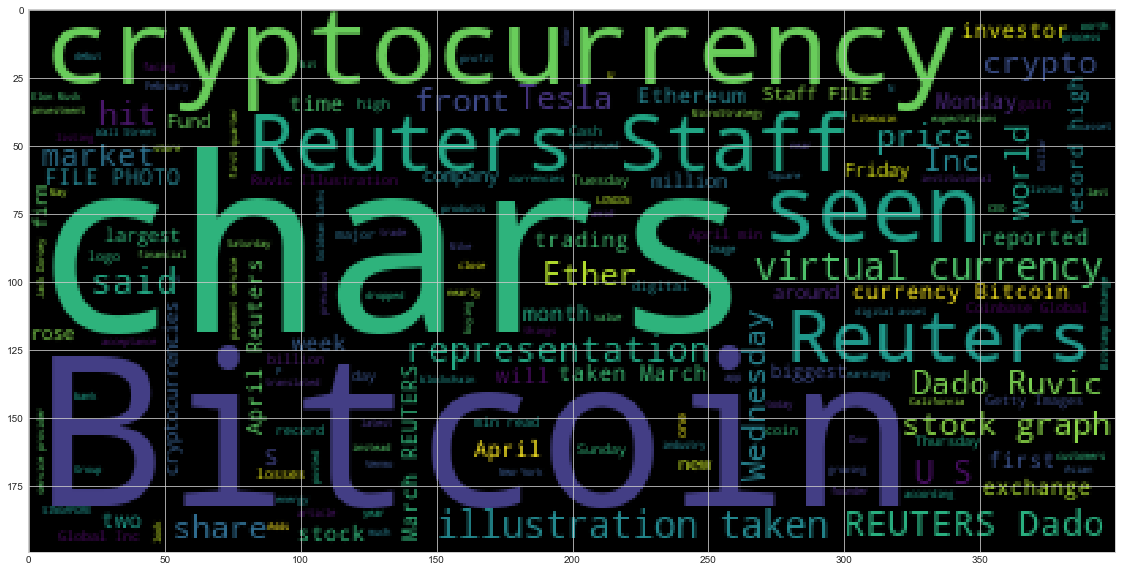

In [167]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_text)
plt.imshow(btc_wc)

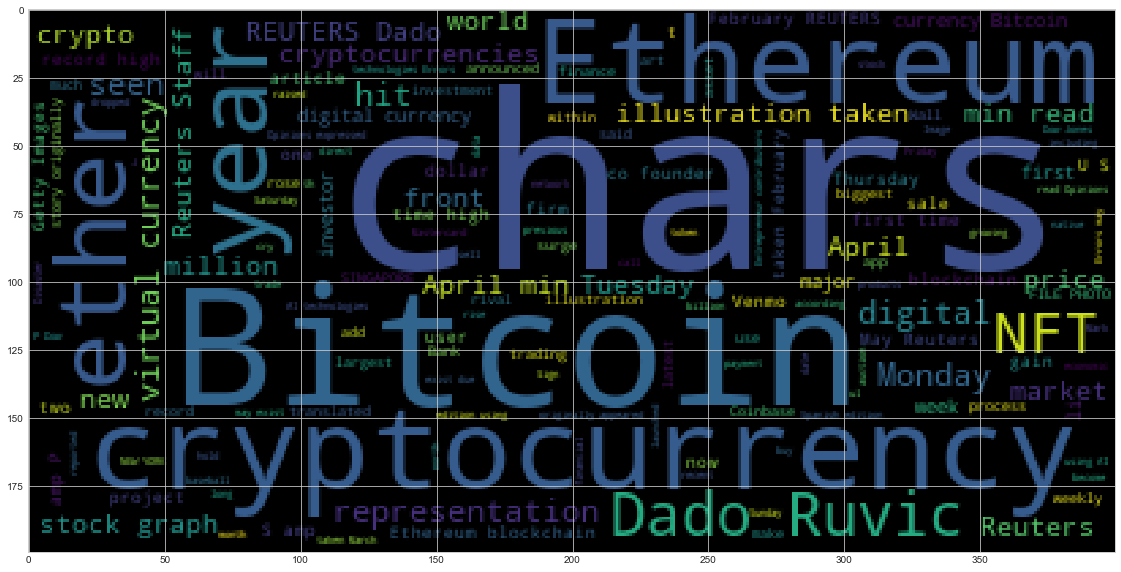

In [168]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_text)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [169]:
import spacy
from spacy import displacy

In [170]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [171]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [172]:
# Concatenate all of the Bitcoin text together
btc_total = ' '.join(bitcoin_df['text'])

In [173]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_total)

# Add a title to the document
btc_doc.user_data['title'] = ' BTC NER'

In [174]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [175]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text + ' ' + ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
a momentous year DATE
2020 DATE
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Three years DATE
Babel Finance ORG
Monday DATE
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coinswitch Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
Reuters ORG
Santa Clarita GPE
Califo

---

### Ethereum NER

In [176]:
# Concatenate all of the Ethereum text together
eth_total = ' '.join(ethereum_df['text'])

In [177]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_total)

# Add a title to the document
eth_doc.user_data['title'] = ' ETH NER'

In [178]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [179]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text + ' ' + ent.label_)

North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
ConsenSys ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Topps GPE
first ORDINAL
NFT ORG
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
February 19, 2021 DATE
Dado Ruvic/Illustr

---